In [1]:
# Import packages we need for data exploration.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Cleaning

In [3]:
# Load the data into a pandas dataframe.
df = pd.read_csv(r"C:\Users\ifunanyaScript\Everything\House_price_prediction_repository\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#  rows, columns
df.shape

(13320, 9)

In [5]:
# Number of houses in each area type. 
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Some columns seem to be redundant.
("area_type columns", "availability", "society" and "balcony") I'll drop these columns, but in best practice you should consult your real estate manager and discuss on how important these columns are in deciding the price of a house

In [6]:
# Get rid of unnecessary columns.
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# A count of the null data points in each column.
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Drop every row that has a null data point or perhaps, You can run any interpolation method 
# of your choice if you do not wish to lose data entries.
df2 = df1.dropna()
print(df2.shape)
df2.isnull().sum()

(13246, 5)


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

The values in the size columns are conflicting. Let's take a look at them.

In [9]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# I'll create a new column, that takes the number from size column, e.g '2 BHK' will be '2' in our new column.
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\ifunanyaScript\AppData\Local\Temp\ipykernel_3520\2483140653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
# The entries in the dataset where bhk is > 20.
df2[df2.bhk>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


The values in total_sqft column seem to be conflicting as well. Let's have a look.

In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

There are several types of data points in the said column. Like range values (0000-1111), and other <br>units of length measurement. We'd address that right away.

In [14]:
# This function takes x (total_sqft column) and convert each data point to a float, 
# and returns False if it's not feasible. 
def convertToFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
# The entries in the dataset where the total_sqft is not a float; using the (~).
df2[~df2['total_sqft'].apply(convertToFloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


A simple approach to address this matter is to take the mean average of the range numbers. <br>
(a+b)/2

In [16]:
# This function takes x (total_sqft) and takes the float average of the range data points.
def convertRangeToFloat(x):
    numbers = x.split(' - ')
    if len(numbers)==2:
        return (float(numbers[0]) + float(numbers[1]))/len(numbers)
    try:
        return float(x)
    except:
        return None # We return None here, if the value cannot be converted to float.

In [17]:
convertRangeToFloat('2334 - 7890')

5112.0

In [18]:
# I'll create a new dataframe and apply the above function to the total_sqft column.
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convertRangeToFloat)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
# Entries in the 30th index.
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [20]:
# A little comparison of the function's ouput.
(2100+2850)/2

2475.0

Perfect!

In [21]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
# A new column 'price per sqft'; the quotient of price/total_sqft.
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft'] # I multiply the price by 100000; 1 lakh = 100000
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


This new column gives a general sense of the actual cost of a house and can be used in outlier<br>
filtering as it gives a clear relative comparison of each data entry. 

In [23]:
# Number of unique locations in the dataset.
len(df4.location.unique())

1304

In [24]:
# Number of houses in each location.
df4.location = df4.location.apply(lambda x: x.strip())

location_tally = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_tally.head(30)

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Name: location, dtype: int64

In [25]:
# Number of locations that have <= 10 houses in the dataset.
len(location_tally[location_tally<=10]) # This is a series so this type of syntax works.

1052

In [26]:
sparse_locations = location_tally[location_tally<=10]
sparse_locations

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

I think it's fair to tie up these sparse locations into one collective variable "others"

In [27]:
# I'm creating a new location variable "other", for all the locations that have less than 10 houses.
df4.location = df4.location.apply(lambda x: 'others' if x in sparse_locations else x)
len(df4.location.unique())

242

The locations are now more concise than earlier.

In [28]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


There are some anomalies in the data where entries have a high bhk value and a low total_sqft<br>
value. For example, the loc(9) of the above dataframe, bhk=6 and total_sqft=1020. <br>
The square feet per bhk should be of a certain value that is comprehendable.<br>
Normally you would ask your real estate manager for a good threshold to use. <br>
I'll use 320

In [29]:
# The entries in the dataset where the quotient of the total_sqft/bhk < 320.
df4[df4.total_sqft/df4.bhk<320].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


## Outlier filtering

In [30]:
# I create a new dataframe where I filter entries that have a (total_sqft/bhk) < 320 .
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [31]:
# Some statistical info about the price_per_sqft column.
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

From the above we can see that there are houses that are overly cheap(min) and some that are<br> overly expensive(max). Since I'm trying to build a generic model that will serve the larger majority,<br>it will be fair to get rid of these extreme entries (outliers).

In [32]:
# I'll create a function that filters out overly expensive and overly cheap houses.
def filter_outliers1(dataframe):
    ''' 
        This function takes the dataframe, and groupby the location.

        For each location, we calculate the mean and standard deviation of the 
        price_per_sqft in that location.

        Then we use the mean and standard deviation to filter entries that lie beyond some 
        specified threshold.
    '''
    df = pd.DataFrame()
    for location, minidf in dataframe.groupby('location'):
        mean = np.mean(minidf.price_per_sqft)
        std = np.std(minidf.price_per_sqft)
        filtered_df = minidf[(minidf.price_per_sqft>(mean-std)) & (minidf.price_per_sqft<=(mean+std))]
        df = pd.concat([df, filtered_df], ignore_index=True)
    return df

In [33]:
df6 = filter_outliers1(df5)
df6.shape

(10241, 7)

We got rid of quite some entries there.

In [34]:
# Number of house in each bhk size.
df6.groupby('bhk')['bhk'].agg('count')

bhk
1      518
2     4756
3     4002
4      745
5      108
6       62
7       19
8       16
9        8
10       3
11       2
13       1
16       1
Name: bhk, dtype: int64

Apparently, most houses have 2 or 3 bhk.

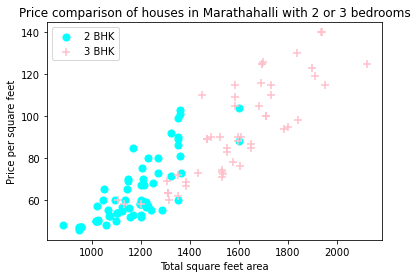

In [35]:
# Let's see how the prices of 2 bhk and 3 bhk vary in the same location.
def scatter_plot(dataframe, location):
    bhk2 = dataframe[(dataframe.location==location) & (dataframe.bhk==2)]
    bhk3 = dataframe[(dataframe.location==location) & (dataframe.bhk==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='cyan', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='pink', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price per square feet')
    plt.title(f'Price comparison of houses in {location} with 2 or 3 bedrooms')
    plt.legend()

scatter_plot(df6, 'Marathahalli')

See how some 3 bhk houses cost less than 2 bhk houses with the same total square feet area.<br>
Normally you'll think that, in the same location, for more bhk, the price of a given house should<br>cost more than one with less bhk, provided the square feet area is fairly same.
<br>
So I'll go ahead and write a function that filters these outliers.

In [36]:
def filter_outliers2(dataframe):
    '''First, I create an array of indices of the outliers to filter/remove; filter_indices.
       
       Second, I group the dataframe by location; location_df
       
       Third, I create an empty dictionary 'bhk_info', and then group 'location_df' by 'bhk'
       
       Fourth, I get the mean and standard deviation of the price per square feet of all the
       house with a particular bhk, and in the same Location. Also the count of the houses.
       
       Finally, I'll pass the stats info to the dictionary and use the information in this
       bhk_info dictionary to get the indices of the entries where the price per square feet
       of a given house, in a given location with more bhk, is less than that of a house 
       with less bhk.
      '''
    filter_indices = np.array([])
    for location, location_df in dataframe.groupby('location'):
        bhk_info = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_info[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            info = bhk_info.get(bhk-1)
            if info and info['count']>5: # Only ones greater than 5.
                filter_indices = np.append(filter_indices, 
                             bhk_df[bhk_df.price_per_sqft<(info['mean'])].index.values)
    return dataframe.drop(filter_indices, axis='index')

df7 = filter_outliers2(df6)
df7.shape

(7329, 7)

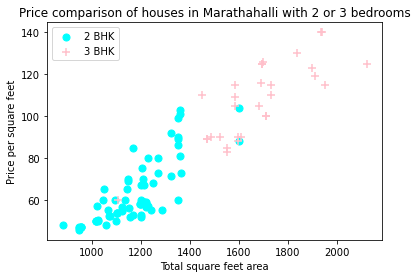

In [37]:
# I'd run the scatter plot function again to see how well we did with filtering the outlier. 
scatter_plot(df7, 'Marathahalli')

We succeeded in filtering those outliers.<br>
Lets see the bath columns, there might be a few outliers in that column.

In [38]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [39]:
# The entries in the dataset where bath is greater than 9.
df7[df7.bath>9]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Counts')

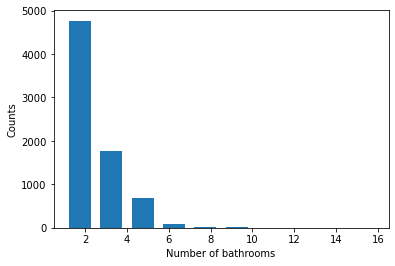

In [40]:
# I'll use a histogtram to see the most common number of bathrooms in the dataset.
plt.hist(df7.bath, rwidth=.7)
plt.xlabel('Number of bathrooms')
plt.ylabel('Counts')

Now there are some houses that have an usual number of bathrooms. Let's check them out.

In [41]:
# Entries in the dataset where the number of bathrooms is more than the bhk+2.
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [42]:
# I create a new dataframe where the number of the bathroom is not more than 
# the bhk+2(prefered threshold).
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7251, 7)

I used the price_per_sqft column to do alot of outlier filtering but I would have to drop<br> it as it won't be an important feature for training the regression model.<br>
As well as the size column.

In [43]:
df9 = df8.drop(['size', 'price_per_sqft'], axis=1)
df9.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


There are over 200 locations in the dataset, and they are all string data type.<br>
Machine learning models don't understand string for the most part, hence<br>
I will use a one-hot encoding approach facilitated by pd.get_dummies, to create<br>
a new dataframe of zeros and ones that represent the location in a certain way.<br>
For example, if the location is 'Electric City', the 'Electric City' column will have a<br> value 1 and every other columns will be zeros.

In [44]:
dummies = pd.get_dummies(df9.location)
dummies.tail()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# We concatenate our dummies-dataframe to out main dataframe.
df10 = pd.concat([df9, dummies.drop('others', axis=1)], axis=1)
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I dropped the 'others' column to prevent the dummy variable trap. <br>
So when all the columns are zero then it will entail 'others' location.

In [46]:
# Create a new dataframe and drop the location column as it isn't needed any longer. 
df11 = df10.drop(['location'], axis=1)
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df11.shape

(7251, 245)

In [48]:
# Create a feature variable 'X', which holds the data for prediction with 'price' dropped.
X = df11.drop('price', axis=1)
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# We create the targets variable 'Y' which holds the price.
Y = df11.price
Y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [50]:
# We'll split the data into training and testing chunks using train_test_split.
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=.1, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train.values, Y_train.values) # Training step!
accuracy = (clf.score(X_test.values, Y_test.values))*100 
print(f'Accuracy of the model: {(accuracy):.1f}%')

Accuracy of the model: 85.6%


In [52]:
# I've implemented a function that uses the model to predict price.
def predictPrice(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]  # Get index of the location passed
    x = np.zeros(len(X.columns)) # Create an array of zeros
    x[0] = sqft  # assign sqft as the first input
    x[1] = bath # assign bath as the second input
    x[2] = bhk  # assign bhk as the third input
    if loc_index > 0:
        x[loc_index] = 1 # assign 1 wherever the location should be in the array.
    return clf.predict([x])[0] 

Note: The arrangement of the values in the __x__ is very important because that's<br>
the structure of the data when we were training the model.

In [53]:
price = predictPrice('1st Block Jayanagar', 2000, 4, 5)
print(f"Price: {price:.2f}Lakh")

Price: 275.88Lakh


In [54]:
price = predictPrice('Electronic City', 1200, 4, 4)
print(f"Price: {price:.2f}Lakh")

Price: 69.12Lakh


In [55]:
price = predictPrice('2nd Stage Nagarbhavi', 900, 2, 3)
print(f"Price: {price:.2f}Lakh")

Price: 177.95Lakh


Clearly, houses appear to be more expensive in some locations and cheaper in some too. <br>
And the model picked that too.

In [ ]:
# Export the model into a pickle file.
import pickle
with open('house_prediction_model.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
# Export the columns as it is, The structure is extremely important for the model to work.
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('coulmns.json', 'w') as f:
    f.write(json.dumps(columns))

In [ ]:
# ifunanyaScript